In [1]:
import grid2op
import os

In [2]:
os.chdir("../dist/")
%pip install plan4grid-0.0.1-py3-none-any.whl

Processing d:\aiplan4grid\dist\plan4grid-0.0.1-py3-none-any.whl
plan4grid is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
Note: you may need to restart the kernel to use updated packages.


In [3]:
from plan4grid.AIPlan4GridAgent import AIPlan4GridAgent
from grid2op.Backend import PandaPowerBackend

In [4]:
env_name = "educ_case14_storage"
operational_horizon = 1
strategic_horizon = 288
solver = "enhsp"
scenario_id = 2

In [5]:
env = grid2op.make(dataset=env_name, test=True, backend=PandaPowerBackend())
agent = AIPlan4GridAgent(
    env=env,
    scenario_id=scenario_id,
    operational_horizon=operational_horizon,
    solver=solver,
    debug=True,
)

d:\AIPlan4Grid\.venv\lib\site-packages\grid2op\MakeEnv\Make.py:420: UserWarning: You are using a development environment. This environment is not intended for training agents. It might not be up to date and its primary use if for tests (hence the "test=True" you passed as argument). Use at your own risk.
  warnings.warn(_MAKE_DEV_ENV_WARN)



* Episode 0:
	No congestion and no topology change detected, no need to solve UP problem.
	Reward: 14.859338760375977

* Episode 1:
	No congestion and no topology change detected, no need to solve UP problem.
	Reward: 14.788910865783691

* Episode 2:
	No congestion and no topology change detected, no need to solve UP problem.
	Reward: 15.35770320892334

* Episode 3:
	No congestion and no topology change detected, no need to solve UP problem.
	Reward: 14.078968048095703

* Episode 4:
	No congestion and no topology change detected, no need to solve UP problem.
	Reward: 15.342342376708984

* Episode 5:
	No congestion and no topology change detected, no need to solve UP problem.
	Reward: 15.515480041503906

* Episode 6:
	No congestion and no topology change detected, no need to solve UP problem.
	Reward: 15.462727546691895

* Episode 7:
	No congestion and no topology change detected, no need to solve UP problem.
	Reward: 14.859338760375977

* Episode 8:
	No congestion and no topology chan

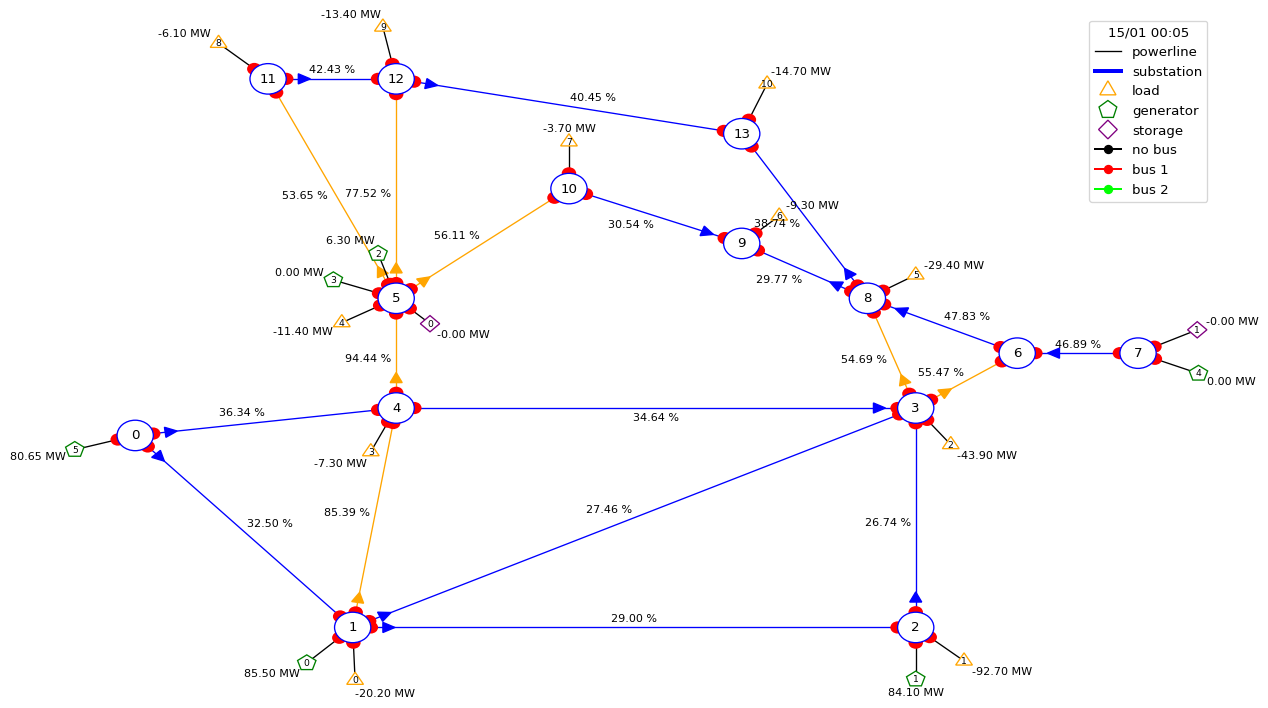

In [6]:
for i in range(strategic_horizon):
    print(f"\n* Episode {i}:")
    obs, reward, done, *_ = agent.progress(i)
    print(f"\tReward: {reward}")
    if done and i != (strategic_horizon - 1):
        print("The episode is done before the end of the strategic horizon!")
        break
agent.display_grid()